2.1 Complete the code

The following code is the completed starter code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def load_data(file_name):
    """ Loads the data.
    """
    npzfile = np.load(file_name)

    inputs_train = npzfile["inputs_train"].T / 255.0
    inputs_valid = npzfile["inputs_valid"].T / 255.0
    inputs_test = npzfile["inputs_test"].T / 255.0
    target_train = npzfile["target_train"].tolist()
    target_valid = npzfile["target_valid"].tolist()
    target_test = npzfile["target_test"].tolist()

    num_class = max(target_train + target_valid + target_test) + 1
    target_train_1hot = np.zeros([num_class, len(target_train)])
    target_valid_1hot = np.zeros([num_class, len(target_valid)])
    target_test_1hot = np.zeros([num_class, len(target_test)])

    for ii, xx in enumerate(target_train):
        target_train_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(target_valid):
        target_valid_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(target_test):
        target_test_1hot[xx, ii] = 1.0

    inputs_train = inputs_train.T
    inputs_valid = inputs_valid.T
    inputs_test = inputs_test.T
    target_train_1hot = target_train_1hot.T
    target_valid_1hot = target_valid_1hot.T
    target_test_1hot = target_test_1hot.T
    return inputs_train, inputs_valid, inputs_test, target_train_1hot, target_valid_1hot, target_test_1hot


def save(file_name, data):
    """ Saves the model to a numpy file.
    """
    print("Writing to " + file_name)
    np.savez_compressed(file_name, data)


def load(file_name):
    """ Loads the model from numpy file.
    """
    print("Loading from " + file_name)
    return dict(np.load(file_name,allow_pickle=True))['arr_0'].item()


def display_plot(train, valid, y_label, number=0):
    """ Displays training curve.
    :param train: Training statistics
    :param valid: Validation statistics
    :param y_label: Y-axis label of the plot
    :param number: The number of the plot
    :return: None
    """
    plt.figure(number)
    plt.clf()
    train = np.array(train)
    valid = np.array(valid)
    plt.plot(train[:, 0], train[:, 1], "b", label="Train")
    plt.plot(valid[:, 0], valid[:, 1], "g", label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel(y_label)
    plt.legend()
    plt.draw()
    plt.pause(0.0001)


In [2]:
""" Instruction:

In this section, you are asked to train a NN with different hyperparameters.
To start with training, you need to fill in the incomplete code. There are 3
places that you need to complete:
a) Backward pass equations for an affine layer (linear transformation + bias).
b) Backward pass equations for ReLU activation function.
c) Weight update equations.

After correctly fill in the code, modify the hyperparameters in "main()".
You can then run this file with the command: "python nn.py" in your terminal.
The program will automatically check your gradient implementation before start.
The program will print out the training progress, and it will display the
training curve by the end. You can optionally save the model by uncommenting
the lines in "main()".
"""


import numpy as np

In [3]:
def init_nn(num_inputs, num_hiddens, num_outputs):
    """ Initializes neural network's parameters.
    :param num_inputs: Number of input units
    :param num_hiddens: List of two elements, hidden size for each layers.
    :param num_outputs: Number of output units
    :return: A dictionary of randomly initialized neural network weights.
    """
    W1 = 0.1 * np.random.randn(num_inputs, num_hiddens[0])
    W2 = 0.1 * np.random.randn(num_hiddens[0], num_hiddens[1])
    W3 = 0.01 * np.random.randn(num_hiddens[1], num_outputs)
    b1 = np.zeros((num_hiddens[0]))
    b2 = np.zeros((num_hiddens[1]))
    b3 = np.zeros((num_outputs))
    model = {
        "W1": W1,
        "W2": W2,
        "W3": W3,
        "b1": b1,
        "b2": b2,
        "b3": b3
    }
    return model

In [4]:
def affine(x, w, b):
    """ Computes the affine transformation.
    :param x: Inputs (or hidden layers)
    :param w: Weight
    :param b: Bias
    :return: Outputs
    """
    y = x.dot(w) + b
    return y

In [5]:
def affine_backward(grad_y, x, w):
    """ Computes gradients of affine transformation.
    Hint: you may need the matrix transpose np.dot(A, B).T = np.dot(B, A) and (A.T).T = A
    :param grad_y: Gradient from upper layer
    :param x: Inputs from the hidden layer
    :param w: Weights
    :return: A tuple of (grad_h, grad_w, grad_b)
        WHERE
        grad_x: Gradients wrt. the inputs/hidden layer.
        grad_w: Gradients wrt. the weights.
        grad_b: Gradients wrt. the biases.
    """
    #####################################################################
    # TODO:                                                             #
    # Complete the function to compute the gradients of affine          #
    # transformation.                                                   #
    #####################################################################
    grad_x = np.dot(grad_y, w.T) # dL/dx = dL/dy * dy/dx(w^T), dimension is N*D
    grad_w = np.dot(x.T, grad_y) # dL/dw = dy/dw(x^T) * dL/dy, dimension is DxM
    grad_b = np.sum(grad_y, axis=0)  # dL/db = dy/db(1^T) * dL/dy, dimension is 1*M
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return grad_x, grad_w, grad_b

In [6]:
def relu(x):
    """ Computes the ReLU activation function.
    :param z: Inputs
    :return: Activation of x
    """
    return np.maximum(x, 0.0)

In [7]:
def relu_backward(grad_y, x):
    """ Computes gradients of the ReLU activation function wrt. the unactivated inputs.
    :param grad_y: Gradient of the activation.
    :param x: Inputs
    :return: Gradient wrt. x
    """
    #####################################################################
    # TODO:                                                             #
    # Complete the function to compute the gradients of relu.           #
    #####################################################################
    grad_x = grad_y * ((x > 0).astype(np.float32)) #the gradient of ReLU is 1 for x>0 and 0 for x<0
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return grad_x

In [8]:
def softmax(x):
    """ Computes the softmax activation function.
    :param x: Inputs
    :return: Activation of x
    """
    return np.exp(x) / np.exp(x).sum(axis=1, keepdims=True)

In [9]:
def nn_forward(model, x):
    """ Runs a forward pass.
    :param model: Dictionary of all the weights.
    :param x: Input to the network.
    :return: Dictionary of all intermediate variables.
    """
    z1 = affine(x, model["W1"], model["b1"])
    h1 = relu(z1)
    z2 = affine(h1, model["W2"], model["b2"])
    h2 = relu(z2)
    y = affine(h2, model["W3"], model["b3"])
    var = {
        "x": x,
        "z1": z1,
        "h1": h1,
        "z2": z2,
        "h2": h2,
        "y": y
    }
    return var

In [10]:
def nn_backward(model, err, var):
    """ Runs the backward pass.
    :param model: Dictionary of all the weights.
    :param err: Gradients to the output of the network.
    :param var: Intermediate variables from the forward pass.
    :return: None
    """
    dE_dh2, dE_dW3, dE_db3 = affine_backward(err, var["h2"], model["W3"])
    dE_dz2 = relu_backward(dE_dh2, var["z2"])
    dE_dh1, dE_dW2, dE_db2 = affine_backward(dE_dz2, var["h1"], model["W2"])
    dE_dz1 = relu_backward(dE_dh1, var["z1"])
    _, dE_dW1, dE_db1 = affine_backward(dE_dz1, var["x"], model["W1"])
    model["dE_dW1"] = dE_dW1
    model["dE_dW2"] = dE_dW2
    model["dE_dW3"] = dE_dW3
    model["dE_db1"] = dE_db1
    model["dE_db2"] = dE_db2
    model["dE_db3"] = dE_db3
    return

In [11]:
def nn_update(model, eta):
    """ Update NN weights.
    :param model: Dictionary of all the weights.
    :param eta: Learning rate
    :return: None
    """
    #####################################################################
    # TODO:                                                             #
    # Complete the function to update the neural network's parameters.  #
    # Your code should look as follows                                  #
    # model["W1"] = ...                                                 #
    # model["W2"] = ...                                                 #
    # ...                                                               #
    #####################################################################
    #update w1,w2,w3, and b1,b2,b3 combined with the learning rate eta
    model["W1"] = model["W1"] - eta * model["dE_dW1"]
    model["b1"] = model["b1"] - eta * model["dE_db1"]
    model["W2"] = model["W2"] - eta * model["dE_dW2"]
    model["b2"] = model["b2"] - eta * model["dE_db2"]
    model["W3"] = model["W3"] - eta * model["dE_dW3"]
    model["b3"] = model["b3"] - eta * model["dE_db3"]
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return

In [12]:
def train(model, forward, backward, update, eta, num_epochs, batch_size):
    """ Trains a simple MLP.
    :param model: Dictionary of model weights.
    :param forward: Forward prop function.
    :param backward: Backward prop function.
    :param update: Update weights function.
    :param eta: Learning rate.
    :param num_epochs: Number of epochs to run training for.
    :param batch_size: Mini-batch size, -1 for full batch.
    :return: A tuple (train_ce, valid_ce, train_acc, valid_acc)
        WHERE
        train_ce: Training cross entropy.
        valid_ce: Validation cross entropy.
        train_acc: Training accuracy.
        valid_acc: Validation accuracy.
    """
    inputs_train, inputs_valid, inputs_test, target_train, target_valid, \
        target_test = load_data("/Users/qinchen/Desktop/q2_materials/toronto_face.npz")
    rnd_idx = np.arange(inputs_train.shape[0])
    
    train_ce_list = []
    valid_ce_list = []
    train_acc_list = []
    valid_acc_list = []
    num_train_cases = inputs_train.shape[0]
    if batch_size == -1:
        batch_size = num_train_cases
    num_steps = int(np.ceil(num_train_cases / batch_size))
    for epoch in range(num_epochs):
        np.random.shuffle(rnd_idx)
        inputs_train = inputs_train[rnd_idx]
        target_train = target_train[rnd_idx]
        for step in range(num_steps):
            # Forward pass.
            start = step * batch_size
            end = min(num_train_cases, (step + 1) * batch_size)
            x = inputs_train[start: end]
            t = target_train[start: end]

            var = forward(model, x)
            prediction = softmax(var["y"])

            train_ce = -np.sum(t * np.log(prediction)) / float(x.shape[0])
            train_acc = (np.argmax(prediction, axis=1) ==
                         np.argmax(t, axis=1)).astype("float").mean()
            #print(("Epoch {:3d} Step {:2d} Train CE {:.5f} "
            #       "Train Acc {:.5f}").format(
            #    epoch, step, train_ce, train_acc))

            # Compute error.
            error = (prediction - t) / float(x.shape[0])

            # Backward prop.
            backward(model, error, var)

            # Update weights.
            update(model, eta)

        valid_ce, valid_acc = evaluate(
            inputs_valid, target_valid, model, forward, batch_size=batch_size)
        #print(("Epoch {:3d} "
        #       "Validation CE {:.5f} "
        #       "Validation Acc {:.5f}\n").format(
        #    epoch, valid_ce, valid_acc))
        train_ce_list.append((epoch, train_ce))
        train_acc_list.append((epoch, train_acc))
        valid_ce_list.append((epoch, valid_ce))
        valid_acc_list.append((epoch, valid_acc))
    display_plot(train_ce_list, valid_ce_list, "Cross Entropy", number=0)
    display_plot(train_acc_list, valid_acc_list, "Accuracy", number=1)

    train_ce, train_acc = evaluate(
        inputs_train, target_train, model, forward, batch_size=batch_size)
    valid_ce, valid_acc = evaluate(
        inputs_valid, target_valid, model, forward, batch_size=batch_size)
    test_ce, test_acc = evaluate(
        inputs_test, target_test, model, forward, batch_size=batch_size)
    print("CE: Train %.5f Validation %.5f Test %.5f" %
          (train_ce, valid_ce, test_ce))
    print("Acc: Train {:.5f} Validation {:.5f} Test {:.5f}".format(
        train_acc, valid_acc, test_acc))

    stats = {
        "train_ce": train_ce_list,
        "valid_ce": valid_ce_list,
        "train_acc": train_acc_list,
        "valid_acc": valid_acc_list
    }

    return model, stats

In [13]:
def evaluate(inputs, target, model, forward, batch_size=-1):
    """ Evaluates the model on inputs and target.
    :param inputs: Inputs to the network
    :param target: Target of the inputs
    :param model: Dictionary of network weights
    :param forward: Function for forward pass
    :param batch_size: Batch size
    :return: A tuple (ce, acc)
        WHERE
        ce: cross entropy
        acc: accuracy
    """
    num_cases = inputs.shape[0]
    if batch_size == -1:
        batch_size = num_cases
    num_steps = int(np.ceil(num_cases / batch_size))
    ce = 0.0
    acc = 0.0
    for step in range(num_steps):
        start = step * batch_size
        end = min(num_cases, (step + 1) * batch_size)
        x = inputs[start: end]
        t = target[start: end]
        prediction = softmax(forward(model, x)["y"])
        ce += -np.sum(t * np.log(prediction))
        acc += (np.argmax(prediction, axis=1) == np.argmax(
            t, axis=1)).astype("float").sum()
    ce /= num_cases
    acc /= num_cases
    return ce, acc

In [14]:
def check_grad(model, forward, backward, name, x):
    """ Check the gradients.
    """
    np.random.seed(0)
    var = forward(model, x)
    loss = lambda y: 0.5 * (y ** 2).sum()
    grad_y = var["y"]
    backward(model, grad_y, var)
    grad_w = model["dE_d" + name].ravel()
    w_ = model[name].ravel()
    eps = 1e-7
    grad_w_2 = np.zeros(w_.shape)
    check_elem = np.arange(w_.size)
    np.random.shuffle(check_elem)
    # Randomly check 20 elements.
    check_elem = check_elem[:20]
    for ii in check_elem:
        w_[ii] += eps
        err_plus = loss(forward(model, x)["y"])
        w_[ii] -= 2 * eps
        err_minus = loss(forward(model, x)["y"])
        w_[ii] += eps
        grad_w_2[ii] = (err_plus - err_minus) / 2. / eps
    np.testing.assert_almost_equal(grad_w[check_elem], grad_w_2[check_elem],
                                   decimal=3)

2.2 Train the neural network with the default set of hyperparameters. Report training, and validation errors and a plot of error curves (training and validation). Examine the statistics and plots of training error and validation error (generalization). How does the network’s performance differ on the training set vs. the validation set during learning?

The following result is the neural network with the default set of hyperparameters. Traing errors and validation errors are reported below. The plot of error curves (training and validation) is also shown below.

From the statistics and plots of training error and validation error (generalization), we can see that as the number of iteration increases, the cross entroy error for training set decreases, while the cross entroy error for validation set is always higher than the one for training set. We can also see that as the number of iteration increases, the accuracy for training set increases, while the accuracy for validation set is always lower than the one for training set. After epoch 500, cross entroy error is keep decreasing for the training set, while for validation set, it is almost unchanged. After epoch 500, accuracy is keep increasing for the training set, while for validation set, it is almost unchanged. 

The network’s performance differs on the training set vs. the validation set during learning. The network’s performance becomes better and better on the training set, while it would be much worse for the validation set. This creates the problem of overfitting. 


Checking gradients...


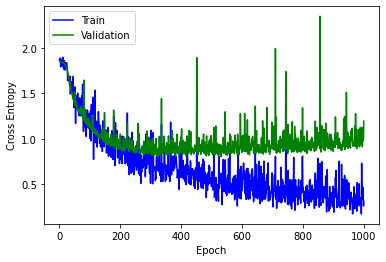

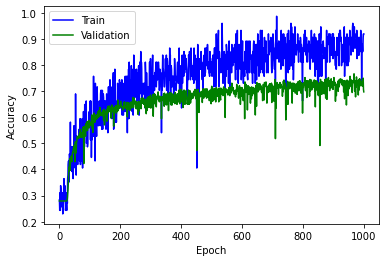

CE: Train 0.45726 Validation 1.19538 Test 1.09318
Acc: Train 0.82306 Validation 0.69690 Test 0.69091
Writing to Desktop/q2_materials/nn_model.npz
Writing to Desktop/q2_materials/nn_stats.npz


In [15]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [16, 32]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    save(stats_file_name, stats)

if __name__ == "__main__":
    main()


2.3 Try different values of the learning rate (step size) η (“eta”) ranging from η ∈ {0.001, 0.01, 0.5}. What happens to the convergence properties of the algorithm (looking at both cross-entropy and percent-correct)? Try 3 different mini-batch sizes ranging from {10,100,1000}. How does mini-batch size affect convergence? How would you choose the best value of these parameters? In each of these hold the other parameters constant while you vary the one you are studying.

The following result is three different values of the learning rate (step size) η (“eta”) ranging from η ∈ {0.001, 0.01, 0.5}. 

If learning rate is too small(near 0.001), the algorithm cannot converge to a minimum which creates the problem of underfitting. The cross entroy error for both training and validation set is very large, while the accuracy for both of them is very low.

If learning rate is too large(near 0.5), the algorithm cannot converge which creates the problem of underfitting. The cross entroy error for both training and validation set is even larger than the one with small learning rate, while the accuracy for both of them is much lower than the one with small learning rate. The problem is even worse.

The following result is three different mini-batch sizes ranging from {10,100,1000}. 

If mini-batch sizes are too small(near 10), the algorithm can converge, but it creates a huge problem of overfitting. The cross entropy error for training set is extremely small, while for validation set, it is unusually large. The accuracy for training set is 100%, while for validation set, it is very low.

If mini-batch sizes are too large(near 1000), the algorithm cannot converge to a minimum which creates the problem of underfitting. The cross entroy error for both training and validation set is very large, while the accuracy for both of them is very low.

For learning rate, since a larger value would create much worse problem of underfitting, I would choose the best value between 0.001(underfitting) and 0.01(overfitting) or the mean of these two values.

For mini-batch sizes, since a smaller value would create much worse problem of overfitting, I would choose the best value between 100(overfittinf) and 1000(underfitting) or the mean of these two values.

Checking gradients...


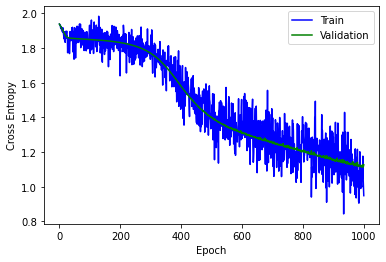

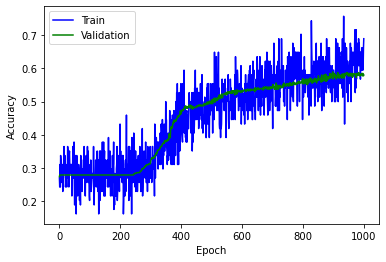

CE: Train 1.10543 Validation 1.12684 Test 1.15172
Acc: Train 0.60670 Validation 0.57995 Test 0.56883


In [16]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [16, 32]
    eta = 0.001
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


Checking gradients...


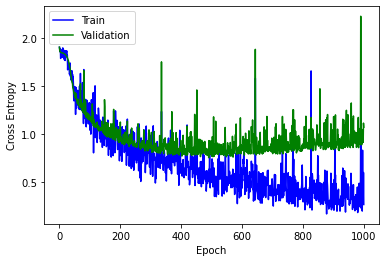

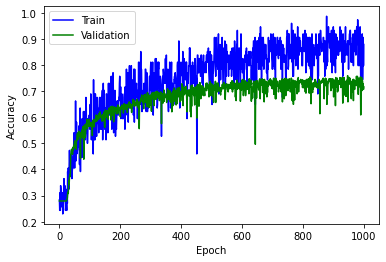

CE: Train 0.38604 Validation 1.07142 Test 0.91233
Acc: Train 0.86396 Validation 0.71599 Test 0.71688


In [17]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [16, 32]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


Checking gradients...


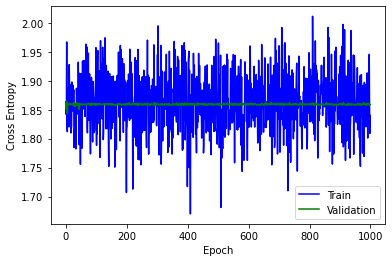

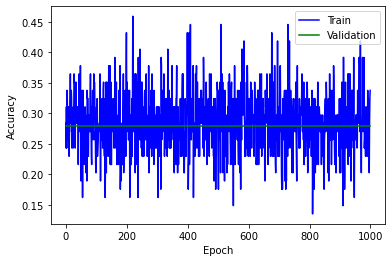

CE: Train 1.86108 Validation 1.85905 Test 1.83904
Acc: Train 0.28542 Validation 0.27924 Test 0.31688


In [18]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [16, 32]
    eta = 0.5
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


Checking gradients...


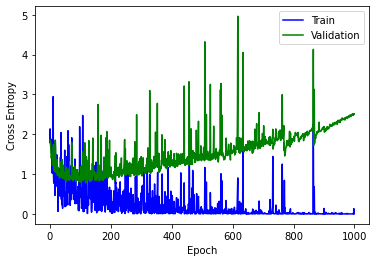

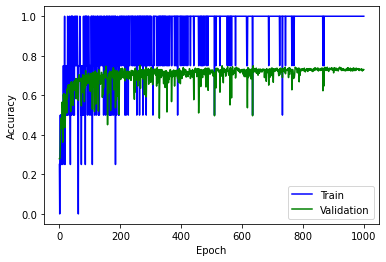

CE: Train 0.00290 Validation 2.51674 Test 2.17491
Acc: Train 1.00000 Validation 0.73031 Test 0.74286


In [19]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [16, 32]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 10

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


Checking gradients...


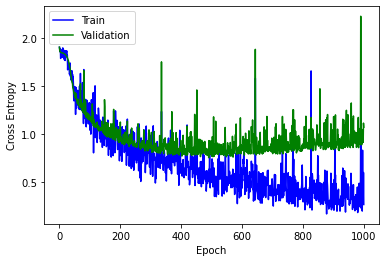

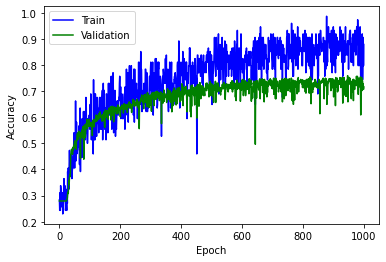

CE: Train 0.38604 Validation 1.07142 Test 0.91233
Acc: Train 0.86396 Validation 0.71599 Test 0.71688


In [20]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [16, 32]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


Checking gradients...


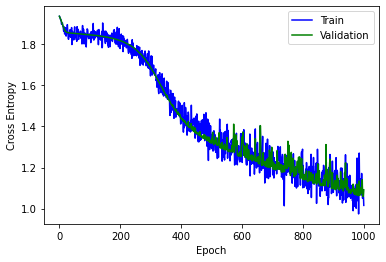

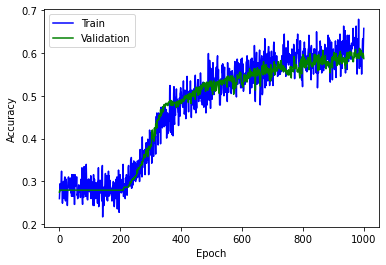

CE: Train 1.06620 Validation 1.09098 Test 1.09856
Acc: Train 0.61440 Validation 0.58711 Test 0.57662


In [21]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [16, 32]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 1000

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


2.4 Try 3 different values of the number of hidden units for each layer of the fully connected network (range from {2, 20, 80}). You might need to adjust the learning rate and the number of epochs (iterations). Comment on the effect of this modification on the convergence properties, and the generalization of the network.

The following result is three different values of the number of hidden units for each layer of the fully connected network (range from {2, 20, 80}).

If hidden units are too small(2,20;less parameters), the model is very simple and the algorithm cannot converge to a minimum which creates the problem of underfitting. The cross entroy error for both training and validation set is very large, while the accuracy for both of them is very low.

If hidden units are too large(20,80;more parameters), the model is very complex and the algorithm can converge to a minimum, but it creates a huge problem of overfitting. The cross entropy error for training set is very small, while for validation set, it is very large. The accuracy for training set is very high, while for validation set, it is very low.

If hidden units are even larger(2,80;even more parameters), the model is very complex and the algorithm cannot converge to a minimum which creates the problem of underfitting. The cross entroy error for both training and validation set is very large, while the accuracy for both of them is very low.

Checking gradients...


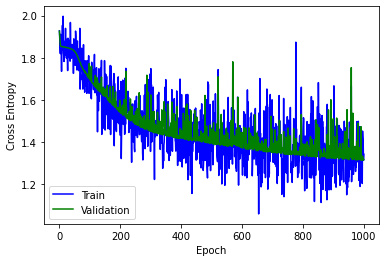

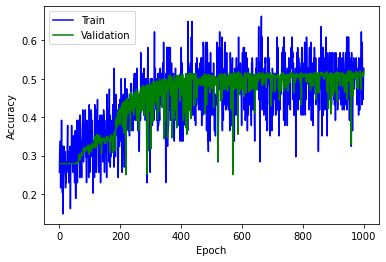

CE: Train 1.29788 Validation 1.31606 Test 1.36535
Acc: Train 0.52223 Validation 0.52029 Test 0.51948


In [22]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [2, 20]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


Checking gradients...


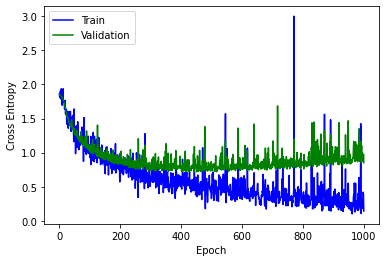

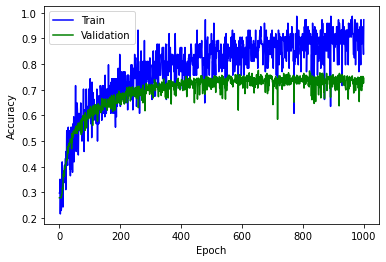

CE: Train 0.21049 Validation 0.85156 Test 0.69026
Acc: Train 0.92679 Validation 0.74463 Test 0.77403


In [23]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [20, 80]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


Checking gradients...


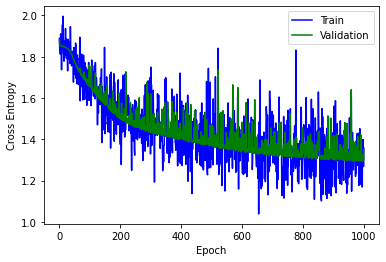

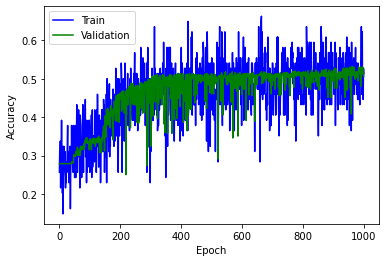

CE: Train 1.31060 Validation 1.34891 Test 1.39247
Acc: Train 0.50978 Validation 0.50597 Test 0.50130


In [24]:
def main():
    """ Trains a neural network.
    :return: None
    """
    model_file_name = "Desktop/q2_materials/nn_model.npz"
    stats_file_name = "Desktop/q2_materials/nn_stats.npz"

    # Hyper-parameters. Modify them if needed.
    num_hiddens = [2, 80]
    eta = 0.01
    num_epochs = 1000 # Number of iterations
    batch_size = 100

    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    # Initialize model.
    model = init_nn(num_inputs, num_hiddens, num_outputs)

    # Uncomment to reload trained model here.
    #model = load(model_file_name)

    # Check gradient implementation.
    print("Checking gradients...")
    x = np.random.rand(10, 48 * 48) * 0.1
    check_grad(model, nn_forward, nn_backward, "W3", x)
    check_grad(model, nn_forward, nn_backward, "b3", x)
    check_grad(model, nn_forward, nn_backward, "W2", x)
    check_grad(model, nn_forward, nn_backward, "b2", x)
    check_grad(model, nn_forward, nn_backward, "W1", x)
    check_grad(model, nn_forward, nn_backward, "b1", x)

    # Train model.
    model, stats = train(model, nn_forward, nn_backward, nn_update, eta,
                  num_epochs, batch_size)

    # Uncomment if you wish to save the model.
    # save(model_file_name, model)

    # Uncomment if you wish to save the training statistics.
    # save(stats_file_name, stats)

if __name__ == "__main__":
    main()


2.5 Plot five examples where the neural network is not confident of the classification output (the top score is below some threshold), and comment on them. Will the classifier be correct if it outputs the top scoring class anyways?

The following results are five examples where the neural network is not confident of the classification output. It is really hard to judge if the prediction is correct or not with human eyes. For example, for the first image, the prediction is anger, but it can also be interpreted as sad. 

For the example faces and the prediction we got from the default set, although it coverges to a minimum, we know we have problems of overfitting. The cross entropy error is high for the test set, and accuracy is very low.
Therefore, the classifier may not be correct even if it outputs the top scoring class. We don't have a high accuracy and low error rate for our test set.

In [25]:
#load the data and model
inputs_train, inputs_valid, inputs_test, target_train, target_valid, \
        target_test = load_data("/Users/qinchen/Desktop/q2_materials/toronto_face.npz")
model_file_name = "Desktop/q2_materials/nn_model.npz"
model = np.load(model_file_name, allow_pickle=True)['arr_0'][()]

In [26]:
forward_pass_test = nn_forward(model, inputs_test) #run a forward pass of the test data
prediction = softmax(forward_pass_test["y"]) #find prediction y hat

In [27]:
#set the threshold so that the top socre is below it
uncertainty_threshold = np.max(prediction, axis=1) < 0.50
#output all the example faces
uncertainty_examples = inputs_test[uncertainty_threshold]
#output the labels for the example faces
uncertainty_target = target_test[uncertainty_threshold]

[1. 0. 0. 0. 0. 0. 0.]


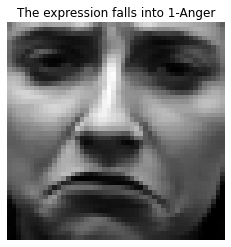

In [36]:
#plot the example face with the threshold we set
plt.figure()
print(uncertainty_target[0])
plt.imshow(np.reshape(uncertainty_examples[2], [48, 48]), cmap='gray')
plt.title('The expression falls into 1-Anger')
plt.axis('off') #remove axis
plt.show()

[0. 1. 0. 0. 0. 0. 0.]


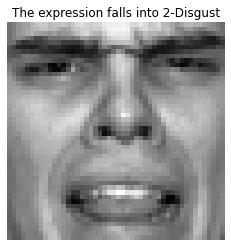

In [34]:
#plot the example face with the threshold we set
plt.figure()
print(uncertainty_target[1])
plt.imshow(np.reshape(uncertainty_examples[1], [48, 48]), cmap='gray')
plt.title('The expression falls into 2-Disgust')
plt.axis('off')#remove axis
plt.show()

[0. 0. 1. 0. 0. 0. 0.]


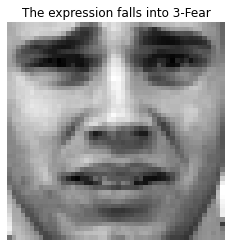

In [37]:
#plot the example face with the threshold we set
plt.figure()
print(uncertainty_target[5])
plt.imshow(np.reshape(uncertainty_examples[5], [48, 48]), cmap='gray')
plt.title('The expression falls into 3-Fear')
plt.axis('off')#remove axis
plt.show()

[1. 0. 0. 0. 0. 0. 0.]


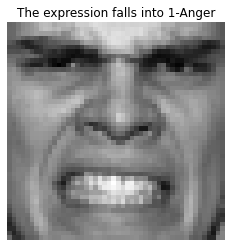

In [39]:
#plot the example face with the threshold we set
plt.figure()
print(uncertainty_target[0])
plt.imshow(np.reshape(uncertainty_examples[0], [48, 48]), cmap='gray')
plt.title('The expression falls into 1-Anger')
plt.axis('off')#remove axis
plt.show()

[0. 0. 0. 0. 1. 0. 0.]


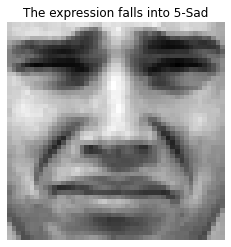

In [40]:
#plot the example face with the threshold we set
plt.figure()
print(uncertainty_target[4])
plt.imshow(np.reshape(uncertainty_examples[4], [48, 48]), cmap='gray')
plt.title('The expression falls into 5-Sad')
plt.axis('off')#remove axis
plt.show()